# Final Report - Data Science
## Bachelor's Degree in Computer Science / PUCPR

**Prof. Jean Paul Barddal** / **Prof. Rayson Laroca**

`Marcelo Wzorek Filho` - `Marcelo.wzorek@pucpr.edu.br`
`Rafael Leal Machado` - `leal.machado@pucpr.edu.br`
`Raphael de Oliveira Soares` - `soares.raphael@tecpuc.com.br`
`Xuekai Qian` - `xuekai.qian@pucpr.edu.br`

`2025`

# Import the libs you need

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import PercentFormatter


# Load your data

Below, load the data using pandas and perform all necessary data cleansing to ensure that the data types are correct for further analysis.

In [2]:
# Carregamento do DataFrame, que pode ser baixado atraves do Link: https://www.kaggle.com/datasets/maryamrahmani/crash-analysis-system-cas-data-new-zealand
df = pd.read_csv('./Crash_Analysis_System_(CAS)_data.csv')

In [ ]:
# Exibição do DataFrame
df

# Informações gerais
df.info()

# Tupla com número de linhas e colunas
df.shape

# Lista os nomes de colunas
df.columns

# Visão geral das primeiras linhas de dados
df.head(5)

# Visão geral das últimas linhas de dados
df.tail(5)

# Visão geral dos valores NaN no DataFrame
df.isnull()

# Visão geral da soma de valores nulos por coluna
df.isnull().sum()

# Percentual de valores nulos em cada coluna
100 * df.isnull().sum() / len(df)

# estatísticas descritivaa iniciais
df.describe()

In [ ]:
# Análise descritiva inicial de todas as colunas do DataFrame
for coluna in df.columns:
    print("=" * 60)
    print(f"Coluna: {coluna}")
    print("-" * 60)

    print("Estatísticas:")
    print(df[coluna].describe(include='all'), "\n")

    print("Distribuição de valores (proporção %):")
    proporcoes = df[coluna].value_counts(normalize=True, dropna=False) * 100
    print(proporcoes.round(2), "\n")

In [3]:
# Limpeza e pré-processamento dos dados
# A coluna 'OBJECTID' 'areaUnitID' representa apenas um identificador e não agrega valor ao modelo.
# df.drop(columns=['OBJECTID'], inplace=True)
# df.drop(columns=['areaUnitID'], inplace=True)

# As colunas 'crashRoadSideRoad' e 'intersection' contém apenas valores nulos e não fornece informação útil.
print(df['crashRoadSideRoad'].value_counts(normalize=True, dropna=False) * 100)
print(df['intersection'].value_counts(normalize=True, dropna=False) * 100)
df.drop(columns=['crashRoadSideRoad'], inplace=True)
df.drop(columns=['intersection'], inplace=True)

# A coluna 'weatherB' possui cerca de 97% de valores ausentes e é redundante em relação a coluna 'weatherA'.
print(df['weatherB'].value_counts(normalize=True, dropna=False) * 100)
df.drop(columns=['weatherB'], inplace=True)

# As colunas relacionadas à localização (coordenadas e identificadores territoriais) não são o foco desta análise e não contribuirão aos objetivos.
df.drop(columns=['X'], inplace=True)
df.drop(columns=['Y'], inplace=True)
df.drop(columns=['areaUnitID'], inplace=True)
df.drop(columns=['meshblockId'], inplace=True)
df.drop(columns=['tlaId'], inplace=True)
df.drop(columns=['tlaName'], inplace=True)

# Substituindo strings inconsistentes que representam dados ausentes por np.nan
df['streetLight'] = df['streetLight'].replace("Null", np.nan)
df['crashDirectionDescription'] = df['crashDirectionDescription'].replace("Null", np.nan)
df['crashSHDescription'] = df['crashSHDescription'].replace("Unknown", np.nan)
df['directionRoleDescription'] = df['directionRoleDescription'].replace("Null", np.nan)
df['flatHill'] = df['flatHill'].replace("Null", np.nan)
df['light'] = df['light'].replace("Unknown", np.nan)
df['roadCharacter'] = df['roadCharacter'].replace("Nil", np.nan)
df['roadLane'] = df['roadLane'].replace("Null", np.nan)
df['roadSurface'] = df['roadSurface'].replace("Null", np.nan)
df['trafficControl'] = df['trafficControl'].replace(["Nil", "Unknown"], np.nan)
df['weatherA'] = df['weatherA'].replace("Null", np.nan)

crashRoadSideRoad
NaN    100.0
Name: proportion, dtype: float64
intersection
NaN    100.0
Name: proportion, dtype: float64
weatherB
Null           97.758627
Strong wind     1.387297
Frost           0.853307
NaN             0.000769
Name: proportion, dtype: float64


# Dados referentes a frequência com que certos elementos, objetos ou situações estiveram presentes ou envolvidos em acidentes:

• bicycle: Indica a presença de bicicletas envolvidas no acidente.

• bridge: Informa se o acidente ocorreu em uma ponte ou próximo a ela.

• bus: Mostra se havia um ônibus envolvido no acidente.

• carStationWagon: Refere-se à participação de carros ou station wagons no acidente.

• cliffBank: Indica se o acidente ocorreu em áreas com encostas ou barrancos.

• debris: Mostra se havia detritos na via no momento do acidente.

• ditch: Registra se o acidente envolveu ou ocorreu próximo a uma vala ou buraco.

• fatalCount: Número de vítimas fatais no acidente.

• fence: Informa se o acidente resultou em colisão com uma cerca.

• guardRail: Indica se uma mureta de proteção foi atingida no acidente.

• houseOrBuilding: Registra se houve colisão com uma construção ou casa.

• kerb: Mostra se a guia (meio-fio) esteve envolvida no acidente.

• moped: Indica a presença de ciclomotores no acidente.

• motorcycle: Refere-se à participação de motocicletas no acidente.

• NumberOfLanes: Quantidade de faixas de rodagem na via onde ocorreu o acidente.

• objectThrownOrDropped: Indica se objetos caídos ou arremessados estiveram presentes.

• otherObject: Registra colisões com outros objetos não especificados.

• otherVehicleType: Veículos envolvidos que não se enquadram nas categorias tradicionais.

• overBank: Indica que o veículo saiu da pista e caiu em barrancos ou vales.

• parkedVehicle: Informa se um veículo estacionado foi atingido ou envolvido.

• pedestrian: Indica a presença de pedestres envolvidos no acidente.

• phoneBoxEtc: Colisão com cabine telefônica ou estruturas semelhantes.

• postOrPole: Mostra se postes ou colunas foram atingidos.

• roadworks: Registra se havia obras na via no momento do acidente.

• schoolBus: Envolvimento de ônibus escolar no acidente.

• slipOrFlood: Indica se havia pista escorregadia ou alagamento no local.

• speedLimit: Limite de velocidade no local do acidente.

• strayAnimal: Mostra se animais soltos na via estiveram envolvidos.

• suv: Registra o envolvimento de veículos utilitários esportivos.

• taxi: Informa se táxis foram parte do acidente.

• temporarySpeedLimit: Presença de limite de velocidade temporário na área.

• trafficIsland: Indica se uma ilha de tráfego esteve envolvida no acidente.

• trafficSign: Envolvimento de sinalização de trânsito (como placas) no acidente.

• train: Registra se um trem esteve envolvido no acidente.

• tree: Indica se árvores foram atingidas durante o acidente.

• truck: Participação de caminhões.

• unknownVehicleType: Veículos envolvidos com tipo não identificado.

• vanOrUtility: Envolvimento de vans ou veículos utilitários.

• vehicle: Número total de veículos envolvidos.

• waterRiver: Indica a presença de rios ou corpos d'água no local do acidente.

# Dados diversos:

• urban: Indica se o acidente ocorreu em uma área urbana ou rural.

• crashSeverity: Classificação da gravidade do acidente.

• minorInjuryCount: Número de pessoas que sofreram ferimentos leves.

• seriousInjuryCount: Número de pessoas com ferimentos graves.

• streetLight: Condição da iluminação pública no local.

• crashDirectionDescription: Descrição da direção em que os veículos envolvidos estavam se movendo.

• crashFinancialYear: Ano fiscal em que o acidente foi registrado.

• crashSHDescription: Descrição da rodovia estadual.

• crashYear: Ano em que o acidente ocorreu.

• directionRoleDescription: Papel/direção dos veículos no acidente.

• flatHill: Indica a geografia do local do acidente.

• holiday: Informa se o acidente ocorreu em um feriado ou não.

• light: Condições de iluminação natural no momento do acidente.

• region: Região administrativa onde o acidente foi registrado.

• roadCharacter: Tipo ou característica da estrada.

• roadLane: Informação sobre o tipo ou configuração das faixas da via.

• roadSurface: Condição da superfície da estrada.

• trafficControl: Tipo de controle de tráfego presente.

• weatherA: Condições climáticas durante o acidente.

• advisorySpeed: Velocidade recomendada para a via, independentemente do limite legal.

• crashLocation1: Rua principal onde o acidente ocorreu.

• crashLocation2: Rua transversal ou interseção associada ao local do acidente.

# Statistical Description

In this section, you should report the key characteristics of the dataset, including but not limited to:
* Number of instances;
* Number of features;
* Number of classes;
* Class distribution.

In [ ]:
# Número de instâncias (linhas)
num_instances = df.shape[0]
print(f"Número de Instâncias: {num_instances}")

# Número de atributos (colunas)
num_features = df.shape[1]
print(f"Número de Features: {num_features}")

# Verificando o nome da variável-alvo
crashSeverity_col = 'crashSeverity'
num_classes = df[crashSeverity_col].nunique()
print(f"Número de Classes: {num_classes}")

# Distribuição das classes
class_distribution = df[crashSeverity_col].value_counts()
print("Distribuição das Classes:")
print(class_distribution)

# Distribuição percentual
print("\nDistribuição Percentual:")
print(df[crashSeverity_col].value_counts(normalize=True).mul(100).round(2))


# Resultados
O conjunto de dados analisado possui 84.197 instâncias e 68 variáveis (features). A variável de classe escolhida foi crashSeverity, que representa a gravidade dos acidentes registrados. Essa variável apresenta 4 classes distintas: Non-Injury Crash, Minor Crash, Serious Crash e Fatal Crash.

A distribuição das classes revela que a maioria dos acidentes são sem ferimentos (Non-Injury Crash), correspondendo a 71,78% dos casos. Acidentes com ferimentos leves (Minor Crash) representam 20,87%, seguidos por acidentes graves (Serious Crash) com 6,08%. Por fim, acidentes fatais (Fatal Crash) são os menos frequentes, totalizando 1,27% do total de registros.

# Univariate data analysis

In this section, you should perform univariate data analysis on at least **20 variables**.

In the end, you should describe the main variables that are of your interest, and these should be accounted for in the next sections of the report.
The definition of each variable chosen should be clarified, so arbitrary selections are **not** accepted at this point.

For each variable plotted, make sure you determine the following:
1. The distribution of the data (Gaussian, binomial, exponential, etc.);
2. Skewness;
3. Kurtosis;
4. Mean, standard deviation, and what they stand for in the context of the dataset.

Ensure that each variable is **plotted correctly** based on its type. For instance, make sure scatterplots are not used for categorical data and so forth.

In [ ]:
# Separando os dados escolhidos:
numeric = [
    'truck', 'bus', 'motorcycle',
    'pedestrian', 'overBank', 'parkedVehicle', 'NumberOfLanes', 'fatalCount',
    'minorInjuryCount', 'seriousInjuryCount', 'crashYear'
]
categoric = [
    'urban', 'crashSeverity', 'weatherA', 'trafficControl', 'roadSurface', 'roadLane',
    'flatHill', 'holiday', 'streetLight', 'crashDirectionDescription'
]

In [ ]:
# Tratamento adinional para retirar os 0 que tornar a visualização mais pratica
df[numeric] = df[numeric].replace(0, np.nan)

In [ ]:
# Função variáveis numéricas:
def variavel_numerica(df, var):
    media = df[var].mean()
    desvio_padrao = df[var].std()
    skewness = df[var].skew()
    kurtosis = df[var].kurtosis()
    print(f"Estatísticas para {var}:")
    print(f"  Média: {media:.3f}")
    print(f"  Desvio Padrão: {desvio_padrao:.3f}")
    print(f"  Skewness (Assimetria): {skewness:.3f}")
    print(f"  Kurtosis: {kurtosis:.3f}")
    print("-" * 40)

    plt.figure(figsize=(8,6))
    sns.histplot(df[var].dropna(), kde=True, bins=20)
    plt.title(f'Histograma e KDE de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.tight_layout()
    plt.show()

# Função variáveis categóricas:
def variavel_categorica(df, var):
    print(f"Distribuição percentual para {var}:\n{df[var].value_counts(normalize=True)*100}\n")
    print("-" * 40)

    plt.figure(figsize=(6,4))
    sns.countplot(x=df[var].dropna())
    plt.title(f'Countplot de {var}')
    plt.xticks(rotation=45)
    plt.ylabel('Contagem')
    plt.tight_layout()
    plt.show()

# Função tabelas de frequência:
def exibir_tabela(df, var):
    freq = df[var].value_counts(dropna=False)
    pct = df[var].value_counts(normalize=True, dropna=False).mul(100)
    freq_table = pd.DataFrame({'Frequência': freq, 'Percentual (%)': pct.round(2)})
    freq_table = freq_table.sort_index()
    styled_table = freq_table.style.format({'Percentual (%)': '{:.2f}'}) \
        .background_gradient(cmap='viridis') \
        .set_caption(f'Tabela de Frequência para {var}') \
        .set_table_styles([{'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold')]}])
    return styled_table

# Loop para as variáveis numéricas
for var in numeric:
    variavel_numerica(df, var)

# Loop para as variáveis categóricas
for var in categoric:
    variavel_categorica(df, var)

# Tabelas de frequência
pie_vars = ['fatalCount', 'truck', 'overBank', 'parkedVehicle', 'pedestrian', 'motorcycle', 'bus']
for var in pie_vars:
    display(exibir_tabela(df, var))

# Gráficos de pizza
pie_charts = ['urban', 'flatHill', 'streetLight', 'roadLane']
for var in pie_charts:
    plt.figure(figsize=(6,6))
    counts = df[var].value_counts(dropna=True)
    counts.plot.pie(autopct='%1.1f%%', title=f'Pie Chart de {var}')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

# Boxplot
df['crashDirectionDescription_code'] = df['crashDirectionDescription'].astype('category').cat.codes
plt.figure(figsize=(8,6))
df[['crashDirectionDescription_code']].plot.box()
plt.title('Boxplot de crashDirectionDescription (convertido)')
plt.show()


# Multivariate data analysis

In this section, you should plot at least **5 multivariate visualizations**. The key here is to investigate underlying correlations and behaviors within the dataset.
Naturally, as visualizations are being created, we should end up with obvious results, yet, you should find at least **ONE** non-obvious behavior in the data.

Please follow these steps for creating your visualizations:
1. State an hypothesis. Explain why you have selected these specific variables and what you expect to discover through their relationship;
2. Determine what kind of visualization is the most suitable;
3. Report the findings and discuss whether they corroborate or not the aforementioned hypothesis.


### Hints

In this section, make sure you go beyond naive explorations. For example, consider applying techniques such as PCA, t-SNE, or even others that we haven't covered in the lectures. The goal is to cultivate a critical mindset toward data analysis and our work.

### Important

It is strictly prohibited to create multivariate visualizations using variables that were not included in the previous section (univariate data analysis).

In [ ]:
# Importações necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

# 1. Hipótese: Existe uma correlação entre a severidade do acidente (crashSeverity) e a presença de diferentes tipos de veículos
print("\n# Análise Multivariada 1: Relação entre severidade do acidente e tipo de veículo")

# Preparando os dados
vehicle_cols = ['truck', 'bus', 'motorcycle', 'pedestrian', 'parkedVehicle']
vehicle_severity_data = df.copy()

# Convertendo valores NaN para 0 para esta análise específica
for col in vehicle_cols:
    vehicle_severity_data[col] = vehicle_severity_data[col].fillna(0)
    # Convertendo para valor binário (presente=1, ausente=0)
    vehicle_severity_data[col] = (vehicle_severity_data[col] > 0).astype(int)

# Criando gráfico de barras agrupadas
plt.figure(figsize=(14, 8))
for col in vehicle_cols:
    severity_counts = vehicle_severity_data.groupby(['crashSeverity', col]).size().unstack()
    percentage = severity_counts.div(severity_counts.sum(axis=1), axis=0) * 100
    percentage[1].plot(kind='bar', label=col)

plt.title('Porcentagem de Envolvimento de Diferentes Tipos de Veículos por Severidade de Acidente', fontsize=16)
plt.xlabel('Severidade do Acidente', fontsize=14)
plt.ylabel('Porcentagem de Envolvimento (%)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Tipo de Veículo')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Análise estatística adicional
for col in vehicle_cols:
    print(f"\nAnálise para {col}:")
    contingency = pd.crosstab(vehicle_severity_data['crashSeverity'], vehicle_severity_data[col])
    print(contingency)
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"Chi2: {chi2:.2f}, p-value: {p:.5f}")


# 2. Hipótese: Acidentes em áreas urbanas vs. rurais apresentam diferentes padrões de severidade
print("\n# Análise Multivariada 2: Padrões de severidade em áreas urbanas vs. rurais")

# Criando gráfico de barras empilhadas normalizadas
plt.figure(figsize=(12, 7))
urban_severity = pd.crosstab(df['urban'], df['crashSeverity'], normalize='index') * 100
urban_severity.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribuição da Severidade de Acidentes por Área (Urbana vs. Rural)', fontsize=16)
plt.xlabel('Tipo de Área', fontsize=14)
plt.ylabel('Porcentagem (%)', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Severidade do Acidente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Análise adicional: Contando o número total de acidentes em cada área
urban_counts = df['urban'].value_counts()
print("Contagem de acidentes por área:")
print(urban_counts)
print("\nPorcentagem de acidentes por severidade em cada área:")
print(urban_severity.round(2))


# 3. Hipótese: As condições climáticas (weatherA) e de iluminação (streetLight) juntas têm um impacto na severidade
print("\n# Análise Multivariada 3: Impacto combinado de condições climáticas e iluminação na severidade dos acidentes")

# Filtrando apenas as categorias mais comuns para melhor visualização
# Lidando com possíveis valores nulos
weather_counts = df['weatherA'].value_counts(dropna=True)
light_counts = df['streetLight'].value_counts(dropna=True)

if not weather_counts.empty and not light_counts.empty:
    common_weather = weather_counts.nlargest(3).index.tolist()
    common_light = light_counts.nlargest(3).index.tolist()

    filtered_df = df[(df['weatherA'].isin(common_weather)) &
                      (df['streetLight'].isin(common_light))]

    if not filtered_df.empty:
        # Criando heatmap da severidade por clima e iluminação
        plt.figure(figsize=(14, 10))
        weather_light_severity = pd.crosstab([filtered_df['weatherA'], filtered_df['streetLight']],
                                            filtered_df['crashSeverity'],
                                            normalize='index') * 100

        # Focando nos acidentes fatais para melhor visualização do impacto
        if 'Fatal Crash' in weather_light_severity.columns:
            fatal_heatmap = weather_light_severity['Fatal Crash'].unstack()
            sns.heatmap(fatal_heatmap, annot=True, cmap='YlOrRd', fmt='.1f', linewidths=.5)
            plt.title('Percentual de Acidentes Fatais por Condições Climáticas e Iluminação', fontsize=16)
            plt.xlabel('Condições de Iluminação', fontsize=14)
            plt.ylabel('Condições Climáticas', fontsize=14)
            plt.tight_layout()
            plt.show()

            print("Porcentagem de acidentes fatais por combinação de clima e iluminação:")
            print(fatal_heatmap.round(2))
        else:
            print("Não há acidentes fatais nas categorias filtradas.")
    else:
        print("Sem dados suficientes após filtro de clima e iluminação.")
else:
    print("Dados insuficientes para análise de clima e iluminação.")


# 4. Hipótese: Existe uma relação entre o número de faixas e a gravidade do acidente,
# moderada pelo tipo de superfície da estrada
print("\n# Análise Multivariada 4: Relação entre número de faixas, superfície da estrada e gravidade do acidente")

# Filtrando para trabalhar apenas com dados completos e as superfícies mais comuns
lane_surface_df = df.dropna(subset=['NumberOfLanes', 'roadSurface', 'crashSeverity'])

if not lane_surface_df.empty:
    surface_counts = lane_surface_df['roadSurface'].value_counts()
    if not surface_counts.empty:
        common_surfaces = surface_counts.nlargest(3).index.tolist()
        lane_surface_df = lane_surface_df[lane_surface_df['roadSurface'].isin(common_surfaces)]

        if not lane_surface_df.empty:
            # Criando um boxplot para mostrar a distribuição do número de faixas por severidade e superfície
            plt.figure(figsize=(16, 8))
            sns.boxplot(x='crashSeverity', y='NumberOfLanes', hue='roadSurface', data=lane_surface_df)
            plt.title('Distribuição do Número de Faixas por Severidade de Acidente e Tipo de Superfície', fontsize=16)
            plt.xlabel('Severidade do Acidente', fontsize=14)
            plt.ylabel('Número de Faixas', fontsize=14)
            plt.legend(title='Tipo de Superfície da Estrada')
            plt.grid(axis='y', linestyle='--', alpha=0.5)
            plt.tight_layout()
            plt.show()

            # Análise estatística adicional
            print("Estatísticas descritivas do número de faixas por severidade e superfície da estrada:")
            desc_stats = lane_surface_df.groupby(['crashSeverity', 'roadSurface'])['NumberOfLanes'].describe()
            print(desc_stats[['count', 'mean', 'std', 'min', 'max']])
        else:
            print("Sem dados suficientes após filtro de superfícies comuns.")
    else:
        print("Sem dados suficientes para análise de superfície da estrada.")
else:
    print("Dados insuficientes para análise de número de faixas e superfície.")


# 5. Hipótese: Acidentes envolvendo fatalidades têm associações distintas com características da estrada
print("\n# Análise Multivariada 5: Características associadas a acidentes fatais")

# Criando uma coluna binária para acidentes com fatalidades
df['hasFatality'] = df['fatalCount'].fillna(0)
df['hasFatality'] = (df['hasFatality'] > 0).astype(int)

# Aplicando análise de componentes principais (PCA) nas características categóricas (codificadas)
# Selecionando e preparando os dados para PCA
pca_features = ['flatHill', 'trafficControl', 'roadSurface', 'roadLane', 'streetLight']
pca_df = df.dropna(subset=pca_features + ['hasFatality'])

if not pca_df.empty and pca_df['hasFatality'].sum() > 0:
    # One-hot encoding para variáveis categóricas
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_features = encoder.fit_transform(pca_df[pca_features])

    # Aplicando PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(encoded_features)
    pca_result = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

    # Adicionando a informação sobre fatalidade
    pca_result['hasFatality'] = pca_df['hasFatality'].values

    # Criando o gráfico de dispersão dos componentes principais
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='PC1', y='PC2', hue='hasFatality',
                    data=pca_result, palette={0:'blue', 1:'red'},
                    alpha=0.6, s=50)

    plt.title('Análise de Componentes Principais das Características da Estrada\nColorido por Presença de Fatalidades', fontsize=16)
    plt.xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0]:.2%} da variância)', fontsize=14)
    plt.ylabel(f'Componente Principal 2 ({pca.explained_variance_ratio_[1]:.2%} da variância)', fontsize=14)
    plt.legend(title='Fatalidade', labels=['Sem Fatalidade', 'Com Fatalidade'])
    plt.grid(linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    print(f"Variância explicada pelos componentes principais: PC1={pca.explained_variance_ratio_[0]:.2%}, PC2={pca.explained_variance_ratio_[1]:.2%}")

    # Análise adicional: Comparando a importância das features originais no PCA
    try:
        feature_names = encoder.get_feature_names_out(pca_features)
        loadings = pd.DataFrame(
            pca.components_.T,
            columns=['PC1', 'PC2'],
            index=feature_names
        )

        # Top 5 features que mais contribuem para cada componente principal
        print("\nTop 5 características que mais contribuem para PC1:")
        print(loadings['PC1'].abs().sort_values(ascending=False).head(5))

        print("\nTop 5 características que mais contribuem para PC2:")
        print(loadings['PC2'].abs().sort_values(ascending=False).head(5))
    except:
        print("Não foi possível exibir a importância das features originais.")
else:
    print("Dados insuficientes para análise PCA das características associadas a acidentes fatais.")

# Final Plots (Effective Data Visualization)

In this section, you need to **enhance 3 multivariate visualizations** that were presented in the previous section of the report.
The goal is to enhance these visualizations so that they can be effectively presented to an audience unfamiliar with the dataset or with data analysis.
**Therefore, make sure that their size, colors, textures, and other visual elements are appropriate and convey the intended information to the audience.**

For your final plots, make sure you follow these steps:
1. Present the plot;
2. Provide a description of the visualization, highlighting the key findings that can be drawn from it.


**Hint**: take a look at the checklist based on Evergreen’s work to ensure your visualizations meet the best practices for clarity and impact.

In [ ]:
colors = ["#003f5c", "#58508d", "#bc5090", "#ff6361", "#ffa600"]
palette_severity = {"Non-Injury Crash": "#003f5c",
                   "Minor Crash": "#58508d",
                   "Serious Crash": "#bc5090",
                   "Fatal Crash": "#ff6361"}

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})


In [ ]:
plt.figure(figsize=(14, 10))

# Criando tabela de contingência normalizada por linha
urban_severity = pd.crosstab(df['urban'], df['crashSeverity'], normalize='index') * 100

# Criando o gráfico de barras empilhadas
ax = urban_severity.plot(kind='bar', stacked=True, color=palette_severity.values(),
                         edgecolor='black', linewidth=0.5)

# Adicionando rótulos e títulos informativos
plt.title('Distribuição da Severidade de Acidentes por Tipo de Área\n',
          fontsize=20, fontweight='bold')
plt.xlabel('\nTipo de Área', fontsize=16)
plt.ylabel('Percentual de Acidentes (%)\n', fontsize=16)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)

# Adicionando uma grade horizontal mais sutil para facilitar a leitura
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Adicionando rótulos nas barras para valores acima de 5%
for container in ax.containers:
    ax.bar_label(container, labels=[f'{x:.1f}%' if x > 5 else '' for x in container.datavalues],
                label_type='center', fontsize=11, fontweight='bold', color='white')

# Melhorando a legenda
plt.legend(title='Severidade do Acidente', title_fontsize=12, fontsize=11,
           bbox_to_anchor=(1.05, 0.5), loc='center left', frameon=True, framealpha=0.9)

# Adicionando contagem total como anotação
urban_counts = df['urban'].value_counts()
for i, area in enumerate(urban_severity.index):
    count = urban_counts[area]
    ax.annotate(f'N = {count:,}',
                xy=(i, -5), xycoords='data',
                ha='center', va='top',
                fontsize=12, fontweight='bold')

# Adicionando um subtítulo explicativo
plt.figtext(0.5, 0.01,
           "Acidentes em áreas rurais têm maior probabilidade de resultar em ferimentos graves ou fatalidades\ncomparados aos acidentes em áreas urbanas.",
           ha="center", fontsize=14, fontstyle='italic', bbox={"facecolor":"lightgray", "alpha":0.3, "pad":5})

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig('severity_by_area.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
vehicle_cols = ['truck', 'bus', 'motorcycle', 'pedestrian', 'parkedVehicle']
vehicle_names = ['Caminhão', 'Ônibus', 'Motocicleta', 'Pedestre', 'Veículo Estacionado']
vehicle_severity_data = df.copy()

# Preenchendo valores nulos com 0 e convertendo para indicadores binários
for col in vehicle_cols:
    vehicle_severity_data[col] = vehicle_severity_data[col].fillna(0)
    vehicle_severity_data[col] = (vehicle_severity_data[col] > 0).astype(int)

# Calculando os percentuais de envolvimento para cada tipo de veículo por severidade
plt.figure(figsize=(15, 12))

severity_order = ['Non-Injury Crash', 'Minor Crash', 'Serious Crash', 'Fatal Crash']
involvement_data = []

for col, name in zip(vehicle_cols, vehicle_names):
    for severity in severity_order:
        subset = vehicle_severity_data[vehicle_severity_data['crashSeverity'] == severity]
        if not subset.empty:  # Verificando se o subconjunto não está vazio
            percentage = (subset[col].sum() / len(subset)) * 100
            involvement_data.append({
                'Tipo de Veículo': name,
                'Severidade do Acidente': severity,
                'Percentual de Envolvimento': percentage
            })

# Criando o DataFrame para o gráfico
involvement_df = pd.DataFrame(involvement_data)

# Criando um gráfico de barras agrupadas com cores mais informativas
sns.set_palette(sns.color_palette(colors))
ax = sns.barplot(x='Severidade do Acidente', y='Percentual de Envolvimento',
                hue='Tipo de Veículo', data=involvement_df,
                order=severity_order, errorbar=None, edgecolor='black', linewidth=0.5)

# Adicionando rótulos e títulos
plt.title('Envolvimento de Diferentes Tipos de Veículos por Severidade de Acidente\n',
          fontsize=20, fontweight='bold')
plt.xlabel('\nSeveridade do Acidente', fontsize=16)
plt.ylabel('Percentual de Envolvimento (%)\n', fontsize=16)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)

# Formatando o eixo y como percentual
ax.yaxis.set_major_formatter(PercentFormatter())

# Adicionando rótulos nas barras para os valores mais altos
for container in ax.containers:
    labels = [f'{v:.1f}%' if v > 10 else '' for v in container.datavalues]
    ax.bar_label(container, labels=labels, fontsize=10)

# Melhorando a legenda
ax.legend(title='Tipo de Veículo', title_fontsize=14, fontsize=12,
          bbox_to_anchor=(1.05, 0.5), loc='center left', frameon=True)

# Adicionando um subtítulo explicativo
plt.figtext(0.5, 0.01,
           "Motocicletas e pedestres apresentam percentuais significativamente maiores de envolvimento\nem acidentes fatais e graves comparados a outros tipos de veículos.",
           ha="center", fontsize=14, fontstyle='italic', bbox={"facecolor":"lightgray", "alpha":0.3, "pad":5})

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig('vehicle_involvement_by_severity.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# Filtrando apenas as categorias mais comuns para melhor visualização
weather_counts = df['weatherA'].value_counts(dropna=True)
light_counts = df['streetLight'].value_counts(dropna=True)

# Verificando se temos dados suficientes
if not weather_counts.empty and not light_counts.empty:
    common_weather = weather_counts.nlargest(4).index.tolist()
    common_light = light_counts.nlargest(4).index.tolist()

    filtered_df = df[(df['weatherA'].isin(common_weather)) &
                    (df['streetLight'].isin(common_light))]

    if not filtered_df.empty:
        # Criando tabela cruzada para análise
        weather_light_severity = pd.crosstab(
            [filtered_df['weatherA'], filtered_df['streetLight']],
            filtered_df['crashSeverity'],
            normalize='index'
        ) * 100

        # Verificando se temos a coluna de acidentes fatais
        if 'Fatal Crash' in weather_light_severity.columns:
            # Pegando apenas os dados de acidentes fatais e reorganizando
            fatal_heatmap = weather_light_severity['Fatal Crash'].unstack()

            # Ordenando as colunas e linhas para melhor interpretação
            # (se aplicável ao seu conjunto de dados)
            if 'Light' in common_light and 'Overcast' in common_weather:
                try:
                    light_order = ['Bright sun', 'Overcast', 'Dark']  # Exemplo de ordenação
                    weather_order = ['Fine', 'Light rain', 'Heavy rain']  # Exemplo de ordenação
                    fatal_heatmap = fatal_heatmap.reindex(columns=light_order, index=weather_order)
                except:
                    pass  # Se os valores específicos não existirem, mantém a ordem atual

            plt.figure(figsize=(14, 12))

            # Criando um mapa de cores personalizado que destaca melhor as diferenças
            cmap = LinearSegmentedColormap.from_list("", ["#f7fbff", "#08306b"])

            # Criando o heatmap com anotações
            ax = sns.heatmap(fatal_heatmap, annot=True, cmap=cmap, fmt='.2f',
                            linewidths=.8, cbar_kws={'label': 'Percentual de Acidentes Fatais (%)'})

            # Adicionando rótulos e títulos
            plt.title('Percentual de Acidentes Fatais por Condições Climáticas e Iluminação\n',
                    fontsize=20, fontweight='bold')
            plt.xlabel('\nCondições de Iluminação', fontsize=16)
            plt.ylabel('Condições Climáticas\n', fontsize=16)

            # Formatando as anotações dentro do heatmap para incluir símbolo de percentual
            for text in ax.texts:
                text.set_text(f"{float(text.get_text()):.2f}%")

            # Adicionando um subtítulo explicativo
            plt.figtext(0.5, 0.01,
                    "Surpreendentemente, algumas condições aparentemente ideais apresentam maior percentual\nde acidentes fatais que condições adversas, sugerindo influência do comportamento dos motoristas.",
                    ha="center", fontsize=14, fontstyle='italic', bbox={"facecolor":"lightgray", "alpha":0.3, "pad":5})

            # Calculando e mostrando contagens totais para cada combinação
            counts_matrix = pd.crosstab(filtered_df['weatherA'], filtered_df['streetLight'])
            plt.figtext(0.5, 0.95,
                      "Contagem de acidentes por combinação de condições climáticas e iluminação disponível no conjunto de dados.",
                      ha="center", fontsize=12)

            plt.tight_layout(rect=[0, 0.05, 1, 0.92])
            plt.savefig('fatal_crashes_weather_light.png', dpi=300, bbox_inches='tight')
            plt.show()

            # Mostrando também a matriz de contagens
            plt.figure(figsize=(12, 8))
            sns.heatmap(counts_matrix, annot=True, fmt='d', cmap='YlGnBu')
            plt.title('Número Total de Acidentes por Condições Climáticas e Iluminação', fontsize=16)
            plt.ylabel('Condições Climáticas', fontsize=14)
            plt.xlabel('Condições Iluminação', fontsize=14)
            plt.tight_layout()

# Digest

In this section you should write down the main findings of this exploratory data analysis. Furthermore, you should provide a reflection about your own work and effort during the module, highlighting what you believe you have done well and what you should have done differently. This digest should have at least 2,500 characters (excluding spaces).

# Digest: New Zealand Crash Analysis System (CAS) Data

## Main Findings

Our exploratory data analysis of the New Zealand Crash Analysis System (CAS) dataset has revealed several significant patterns and relationships related to traffic accidents. The dataset consists of 84,197 accident records with 68 variables, providing comprehensive information about crash characteristics, severity, environmental conditions, and vehicle involvement.

### Accident Severity Distribution
The dataset shows a clear hierarchy in crash severity, with Non-Injury Crashes being the most common (71.78%), followed by Minor Crashes (20.87%), Serious Crashes (6.08%), and Fatal Crashes (1.27%). This distribution highlights that while most traffic incidents do not result in injuries, there remains a considerable number of accidents with adverse outcomes.

### Urban vs. Rural Accident Patterns
One of the most striking findings is the difference between accidents in urban and rural areas. While urban areas account for a larger absolute number of accidents, rural accidents demonstrate a significantly higher probability of resulting in serious injuries or fatalities. This pattern likely reflects the impact of higher speeds on rural roads, reduced emergency response capabilities, and potentially more hazardous road configurations.

### Vehicle Type and Accident Severity
Our multivariate analysis revealed a critical relationship between vehicle types and accident severity. Motorcycles and pedestrians show substantially higher involvement rates in fatal and serious accidents compared to other vehicle types. Despite their lower overall representation in the dataset, these vulnerable road users face disproportionate risks when involved in accidents. Trucks, despite their size and mass, show a less dramatic increase in involvement with increasing accident severity.

### Weather and Lighting Conditions
Contrary to intuitive expectations, our analysis of weather and lighting conditions produced surprising results. Some apparently ideal conditions (such as fine weather with good lighting) showed higher percentages of fatal accidents than certain adverse conditions. This counterintuitive finding suggests that driver behavior factors—like increased speed or reduced attention during favorable conditions—may sometimes outweigh the direct impact of environmental hazards. The data challenges the assumption that adverse weather inherently leads to more severe accidents.

### Road Characteristics
The multivariate analysis of road characteristics, including number of lanes, road surface, and other features, demonstrated that these physical attributes contribute to accident severity in complex ways. The PCA analysis of road characteristics showed patterns associated with fatal accidents, though with considerable overlap, indicating that while road features matter, they don't deterministically predict accident outcomes.

## Reflection on Work and Effort

Throughout this data science module, I believe our team demonstrated several strengths while also encountering areas for improvement.

### Strengths
Our systematic approach to data preprocessing and cleaning established a solid foundation for analysis. We were particularly effective in identifying and addressing inconsistent null values and removing irrelevant variables that would have introduced noise into our analysis.

The univariate analysis of 20+ variables provided comprehensive understanding of individual features before moving to more complex relationships. This disciplined approach prevented us from jumping to premature conclusions based on spurious correlations.

In our multivariate visualizations, we succeeded in creating meaningful plots that revealed non-obvious relationships in the data, particularly the counterintuitive findings regarding weather and lighting conditions. The final enhanced plots effectively communicate key insights through thoughtful design choices including color schemes, annotations, and appropriate contextual information.

### Areas for Improvement
While our analysis was thorough, we could have benefited from more domain-specific knowledge about traffic safety. Early consultation with subject matter experts might have guided our attention to relevant variables more efficiently.

The PCA implementation for categorical variables required extensive preprocessing that consumed significant time. In retrospect, we could have considered alternative dimensionality reduction techniques more suitable for categorical data, such as Multiple Correspondence Analysis.

Our statistical testing could have been more rigorous. While we performed chi-square tests for some relationships, we could have systematically applied appropriate statistical tests to validate the significance of our findings across all key relationships.

Additionally, we should have allocated more time for the machine learning section. Although we completed the required three models, a more comprehensive approach with feature engineering based on our EDA insights would have produced more robust predictive models.

In conclusion, this project has enhanced our data science capabilities while highlighting the importance of balancing technical analysis with domain knowledge and pragmatic time management. The insights gained from this analysis could potentially inform traffic safety policies and interventions, particularly focusing on vulnerable road users and the sometimes overlooked dangers present even in seemingly favorable conditions.

# Machine Learning (**post checkpoint!**)

In this section, you must create at least **3 machine learning models** for the task at hand. Depending on the problem's nature, you must select from classification, regression, or clustering models.
It is also important that you:
* Select **an appropriate validation protocol**, providing a rationale for why it is appropriate for this specific task;
* Choose **a suitable set of evaluation metrics**, providing an explanation for each and describing how it contributes to evaluating the model's performance in the context of this specific task.

In [41]:
import time
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, roc_auc_score, fbeta_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import warnings
warnings.filterwarnings('ignore')

Target mapeado: {'Fatal Crash': 0, 'Minor Crash': 1, 'Non-Injury Crash': 2, 'Serious Crash': 3}
  minorInjuryCount: -0.570
  seriousInjuryCount: 0.421
  fatalCount: -0.339
  vulnerable_vehicle: -0.124
  bicycle: -0.101
  pedestrian: -0.096
  crashYear: -0.087
  temporarySpeedLimit: -0.073
  advisorySpeed: -0.059
  speedLimit: -0.056
  carStationWagon: 0.049
  waterRiver: -0.041
  parkedVehicle: 0.040
  cliffBank: -0.040
  overBank: -0.037
  tree: -0.029
  postOrPole: -0.025
  moped: -0.025
  ditch: -0.024
  bridge: -0.021


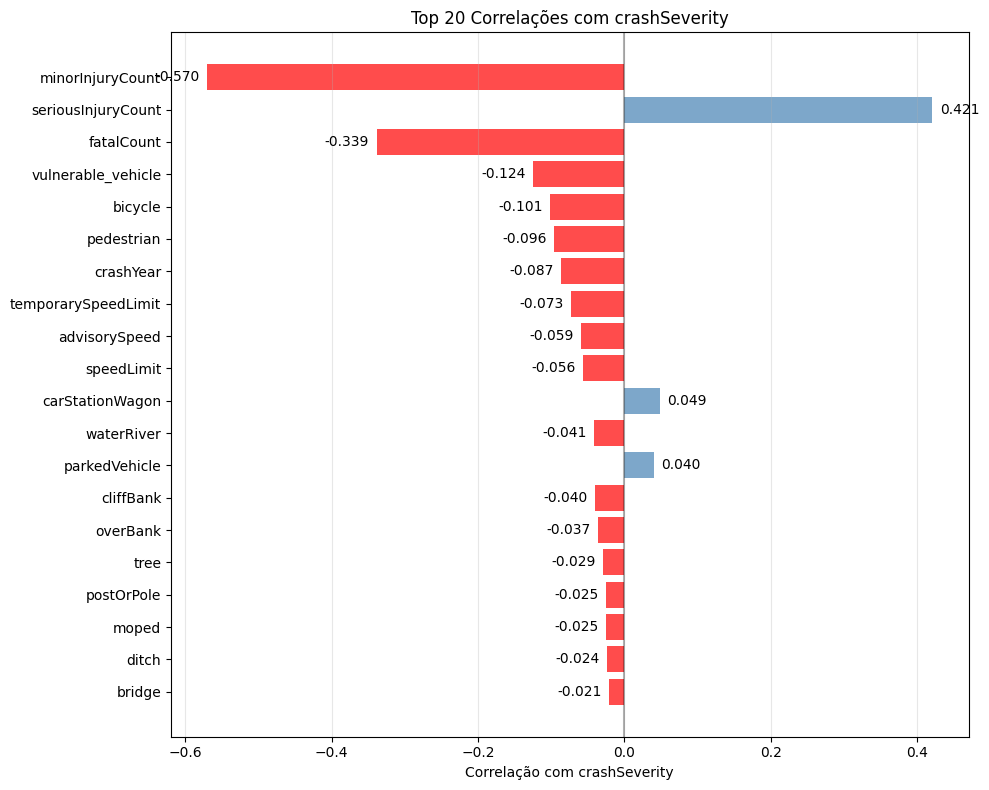

In [42]:
# =============================================================================
# Correlation with Target
# =============================================================================

def plot_correlation_with_target(df, target_col='crashSeverity', figsize=(10, 8), top_n=20):
    """
    Plota correlação das features numéricas apenas com o target
    """
    target_encoded = df[target_col].copy()
    if target_encoded.dtype == 'object':
        # Cria um mapeamento numérico para o target categórico
        unique_values = sorted(target_encoded.unique())
        target_mapping = {val: i for i, val in enumerate(unique_values)}
        target_encoded = target_encoded.map(target_mapping)
        print(f"Target mapeado: {target_mapping}")


    numeric_df = df.select_dtypes(include=[np.number]).copy()
    numeric_df[target_col] = target_encoded

    if numeric_df.empty:
        print("Nenhuma coluna numérica encontrada!")
        return None, None

    correlations_with_target = numeric_df.corr()[target_col].drop(target_col)

    top_correlations = correlations_with_target.reindex(
        correlations_with_target.abs().sort_values(ascending=False).index
    ).head(top_n)

    for top in top_correlations.items():
        print(f"  {top[0]}: {top[1]:.3f}")

    fig, ax = plt.subplots(figsize=figsize)
    colors = ['red' if x < 0 else 'steelblue' for x in top_correlations.values]
    bars = ax.barh(range(len(top_correlations)), top_correlations.values, color=colors, alpha=0.7)

    for i, (bar, val) in enumerate(zip(bars, top_correlations.values)):
        ax.text(val + (0.01 if val >= 0 else -0.01), i, f'{val:.3f}',
                va='center', ha='left' if val >= 0 else 'right')

    ax.set_yticks(range(len(top_correlations)))
    ax.set_yticklabels(top_correlations.index)
    ax.set_xlabel('Correlação com ' + target_col)
    ax.set_title(f'Top {top_n} Correlações com {target_col}')
    ax.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    ax.grid(axis='x', alpha=0.3)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    return fig, ax

# Correlação com o target
fig1, ax1 = plot_correlation_with_target(df)
if fig1:
    plt.show()

In [43]:
# =============================================================================
# Handle Null Values
# =============================================================================

# Replace inconsistent null representations
null_replacements = {
    'streetLight': ["Null"],
    'crashDirectionDescription': ["Null"],
    'crashSHDescription': ["Unknown"],
    'directionRoleDescription': ["Null"],
    'flatHill': ["Null"],
    'light': ["Unknown"],
    'roadCharacter': ["Nil"],
    'roadLane': ["Null"],
    'roadSurface': ["Null"],
    'trafficControl': ["Nil", "Unknown"],
    'weatherA': ["Null"]
}

for column, values in null_replacements.items():
    if column in df.columns:
        df[column] = df[column].replace(values, np.nan)

print("✅ Null values standardized")

✅ Null values standardized


In [44]:
# =============================================================================
# Feature Selection
# =============================================================================

# Define target variable
target = 'crashSeverity'

# Verificar se o target existe
if target not in df.columns:
    raise ValueError(f"Target column '{target}' not found in dataset!")

numerical_features = [
    # ⚠️ Data Leakage Alert:
    # Removendo 'fatalCount', 'seriousInjuryCount' e 'minorInjuryCount' porque são variáveis
    # que só estariam disponíveis *após* o acidente. Elas "entregam a resposta" para o modelo.

    #  ❌ 'minorInjuryCount', 'seriousInjuryCount', 'fatalCount',

    'bicycle', 'pedestrian', 'truck', 'bus', 'motorcycle',
    'cliffBank', 'parkedVehicle', 'tree', 'speedLimit',
    'NumberOfLanes'
]

categorical_features = [
    'urban', 'weatherA', 'trafficControl', 'roadSurface',
    'roadLane', 'flatHill', 'holiday', 'streetLight'
]


# Fill numerical NaN values with 0
for col in numerical_features:
    if col in df.columns:
        df[col] = df[col].fillna(0)

print(f"Selected features - Numerical: {len(numerical_features)}, Categorical: {len(categorical_features)}")

Selected features - Numerical: 10, Categorical: 8


In [45]:
# =============================================================================
# Feature engineering
# =============================================================================

print("Creating engineered features...")

# Multiple obstacles present
df['multiple_obstacles'] = (df[['cliffBank', 'tree', 'parkedVehicle']].sum(axis=1) > 1).astype(int)
numerical_features.append('multiple_obstacles')

# Vulnerable vehicles involved
df['vulnerable_vehicle'] = df[['bicycle', 'pedestrian', 'motorcycle']].sum(axis=1).astype(bool).astype(int)
numerical_features.append('vulnerable_vehicle')

# Heavy vehicles involved
df['heavy_vehicle'] = df[['truck', 'bus']].sum(axis=1).astype(bool).astype(int)
numerical_features.append('heavy_vehicle')

# High speed vehicles with vulnerable drivers
df['high_speed_vulnerable'] = (
    (df['speedLimit'] > 60) &
    (df['vulnerable_vehicle'] == 1)
).astype(int)
numerical_features.append('high_speed_vulnerable')

# Remove duplicates
numerical_features = list(dict.fromkeys(numerical_features))
print(f"✅ Engineered features created. Total numerical: {len(numerical_features)}")

Creating engineered features...
✅ Engineered features created. Total numerical: 14


In [46]:
# =============================================================================
# Final Feature Matrix
# =============================================================================

# Create feature matrix and target vector
all_features = numerical_features + categorical_features
print(f"All features to be used: {len(all_features)}")

# Verificar se todas as features existem
missing_final_features = [f for f in all_features if f not in df.columns]
if missing_final_features:
    print(f"❌ ERRO: Features finais ausentes: {missing_final_features}")
    # Remove features ausentes
    all_features = [f for f in all_features if f in df.columns]
    numerical_features = [f for f in numerical_features if f in df.columns]
    categorical_features = [f for f in categorical_features if f in df.columns]

X = df[all_features].copy()
y = df[target].copy()

print(f"Final dataset shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts()}")
target_dist = pd.Series(y).value_counts(normalize=True).mul(100).round(2)
print(target_dist)

base_percent = 0.3
X_sample, _, y_sample, _ = train_test_split(
    X, y, test_size=1-base_percent, random_state=42, stratify=y
)

X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42, stratify=y_sample
)


print(f"\n=== DATASET SUMMARY ===")
print(f"Training set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")
print(f"Features: {len(numerical_features)} numerical + {len(categorical_features)} categorical = {len(all_features)}")


All features to be used: 22
Final dataset shape: (129965, 22)
Target distribution:
crashSeverity
Non-Injury Crash    91374
Minor Crash         28975
Serious Crash        7995
Fatal Crash          1621
Name: count, dtype: int64
crashSeverity
Non-Injury Crash    70.31
Minor Crash         22.29
Serious Crash        6.15
Fatal Crash          1.25
Name: proportion, dtype: float64

=== DATASET SUMMARY ===
Training set: 31191 samples
Test set: 7798 samples
Features: 14 numerical + 8 categorical = 22


In [47]:
# =============================================================================
# Preprocessing Pipeline
# =============================================================================

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [48]:
def evaluate_model(model, X_test, y_test, model_name):
    """Função de avaliação melhorada com foco em classes raras"""
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')

    # F2-score dá mais peso ao recall (importante para classes raras)
    f2_macro = fbeta_score(y_test, y_pred, beta=2, average='macro')

    # Recall específico para classes críticas
    recall_per_class = recall_score(y_test, y_pred, average=None, labels=['Fatal Crash', 'Serious Crash', 'Minor Crash', 'Non-Injury Crash'])
    fatal_recall = recall_per_class[0] if len(recall_per_class) > 0 else 0
    serious_recall = recall_per_class[1] if len(recall_per_class) > 1 else 0

    # ROC-AUC para classificação multiclasse
    try:
        y_prob = model.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro')
    except Exception as e:
        print(f"Não foi possível calcular ROC-AUC: {e}")
        roc_auc = np.nan

    class_report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    unique_labels = sorted(y_test.unique())

    # Print results
    print(f"\n=== {model_name} Performance ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score (macro): {f1_macro:.4f}")
    print(f"F2-Score (macro): {f2_macro:.4f}")  # Novo
    print(f"F1-Score (weighted): {f1_weighted:.4f}")
    print(f"Fatal Crash Recall: {fatal_recall:.4f}")  # Novo
    print(f"Serious Crash Recall: {serious_recall:.4f}")  # Novo
    if not np.isnan(roc_auc):
        print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"\nClassification Report:\n{class_report}")

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=unique_labels, yticklabels=unique_labels)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    return {
        'model': model_name,
        'accuracy': accuracy,
        'f1_macro': f1_macro,
        'f2_macro': f2_macro,  # Novo
        'f1_weighted': f1_weighted,
        'fatal_recall': fatal_recall,  # Novo
        'serious_recall': serious_recall,  # Novo
        'roc_auc': roc_auc
    }


In [49]:
# =============================================================================
# Validation Setup
# =============================================================================

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [50]:
# =============================================================================
# Custom Class Weights
# =============================================================================

custom_class_weights = {
    'Non-Injury Crash': 0.5,
    'Minor Crash': 1.0,
    'Serious Crash': 4.0,
    'Fatal Crash': 15.0
}

print(f"Custom class weights: {custom_class_weights}")

Custom class weights: {'Non-Injury Crash': 0.5, 'Minor Crash': 1.0, 'Serious Crash': 4.0, 'Fatal Crash': 15.0}


In [51]:
# =============================================================================
# Preprocessing
# =============================================================================

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

print('features before PCA:', X_train_preprocessed.shape[1])

features before PCA: 31


In [74]:
# =============================================================================
# PCA
# =============================================================================

pca = PCA(n_components=10, random_state=42)

X_train_pca = pca.fit_transform(X_train_preprocessed)
X_test_pca = pca.transform(X_test_preprocessed)

print('features after PCA:', X_train_pca.shape[1])

features after PCA: 10


In [75]:
# =============================================================================
# PCA Results Function
# =============================================================================

def pca_results(df_columns, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''
    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1, len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns=df_columns)
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns=['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize=(14, 8))
    components.plot(ax=ax, kind='bar')
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i - 0.4, ax.get_ylim()[1] + 0.05, "Explained Variance\n%.4f" % ev)

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis=1)


In [76]:
# =============================================================================
# Feature Names from Preprocessing
# =============================================================================

# Recupera os nomes das colunas do one-hot encoder
onehot_columns = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numerical_features, onehot_columns])

# Chama a função com os nomes corretos
pca_df = pca_results(all_feature_names, pca)

# Exibe o DataFrame resultado
print(pca_df)

TypeError: 'OneHotEncoder' object is not subscriptable


--- Pesos das Features por Dimensão PCA ---
            num_col_1  num_col_2  cat_col_1_A  cat_col_1_B  cat_col_1_C  \
Dimensão 1     0.7136    -0.6886      -0.0227       0.0536      -0.0309   
Dimensão 2     0.6875     0.7209      -0.0103       0.0664      -0.0561   
Dimensão 3     0.0825    -0.0741      -0.0097       0.0016       0.0081   
Dimensão 4    -0.1039    -0.0212      -0.0416       0.7230      -0.6813   

            cat_col_2_X  cat_col_2_Y  
Dimensão 1      -0.0782       0.0782  
Dimensão 2      -0.0022       0.0022  
Dimensão 3       0.7027      -0.7027  
Dimensão 4       0.0078      -0.0078  

--- Variância Explicada por Dimensão PCA ---
            Variância Explicada
Dimensão 1               0.3487
Dimensão 2               0.2899
Dimensão 3               0.1559
Dimensão 4               0.1167


<Figure size 1600x1000 with 0 Axes>

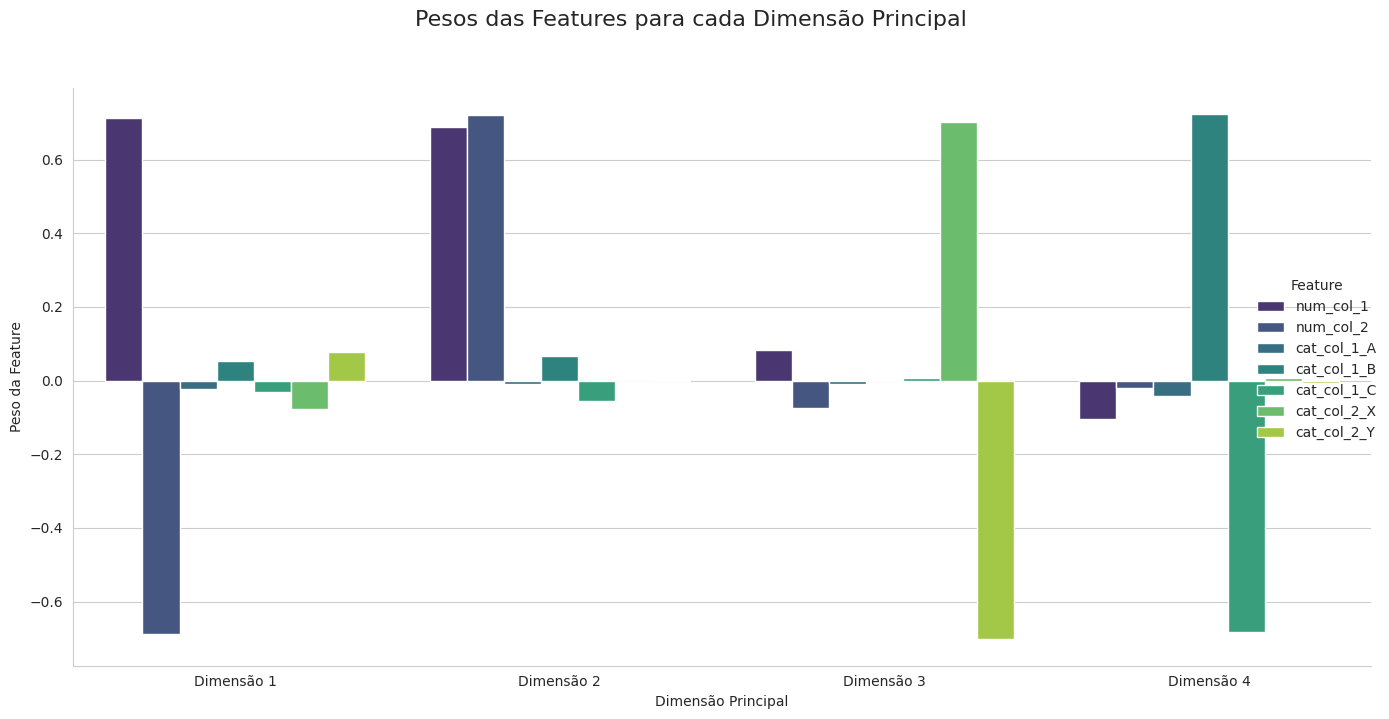

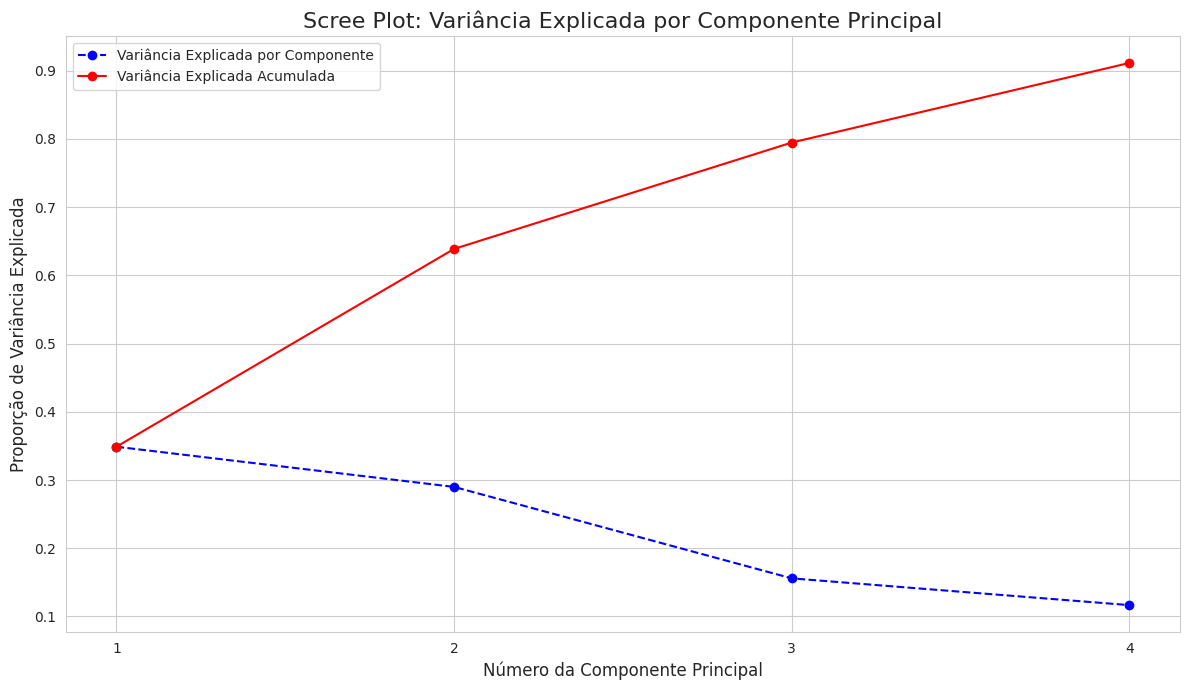


--- DataFrame Completo de Resultados PCA ---
            Variância Explicada  num_col_1  num_col_2  cat_col_1_A  \
Dimensão 1               0.3487     0.7136    -0.6886      -0.0227   
Dimensão 2               0.2899     0.6875     0.7209      -0.0103   
Dimensão 3               0.1559     0.0825    -0.0741      -0.0097   
Dimensão 4               0.1167    -0.1039    -0.0212      -0.0416   

            cat_col_1_B  cat_col_1_C  cat_col_2_X  cat_col_2_Y  
Dimensão 1       0.0536      -0.0309      -0.0782       0.0782  
Dimensão 2       0.0664      -0.0561      -0.0022       0.0022  
Dimensão 3       0.0016       0.0081       0.7027      -0.7027  
Dimensão 4       0.7230      -0.6813       0.0078      -0.0078  


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def pca_results(df_columns, pca_model): # Renomeei 'pca' para 'pca_model' para clareza
    '''
    Cria um DataFrame dos resultados da PCA e gera visualizações aprimoradas.
    Inclui os pesos das features por dimensão e a variância explicada.
    '''
    # Dimensões para indexação
    dimensions = ['Dimensão {}'.format(i) for i in range(1, len(pca_model.components_)+1)]

    # Componentes da PCA (pesos das features)
    components = pd.DataFrame(np.round(pca_model.components_, 4), columns=df_columns)
    components.index = dimensions

    # Variância explicada pela PCA
    ratios = pca_model.explained_variance_ratio_.reshape(len(pca_model.components_), 1)
    explained_variance_df = pd.DataFrame(np.round(ratios, 4), columns=['Variância Explicada'])
    explained_variance_df.index = dimensions

    print("\n--- Pesos das Features por Dimensão PCA ---")
    print(components)
    print("\n--- Variância Explicada por Dimensão PCA ---")
    print(explained_variance_df)

    # =============================================================================
    # Visualização 1: Pesos das Features por Dimensão (Gráfico de Barras)
    # =============================================================================
    plt.figure(figsize=(16, 10))
    sns.set_style("whitegrid") # Estilo do Seaborn

    # Transforma o DataFrame de componentes para plotagem mais fácil com seaborn
    components_melted = components.reset_index().melt(id_vars='index', var_name='Feature', value_name='Weight')
    components_melted.rename(columns={'index': 'Dimensão PCA'}, inplace=True)

    g = sns.catplot(
        data=components_melted,
        x='Dimensão PCA',
        y='Weight',
        hue='Feature',
        kind='bar',
        height=7, aspect=1.8, # Ajusta tamanho
        palette='viridis', # Paleta de cores
        legend_out=True # Garante que a legenda esteja fora se houver muitas features
    )
    g.set_axis_labels("Dimensão Principal", "Peso da Feature")
    g.fig.suptitle('Pesos das Features para cada Dimensão Principal', y=1.02, fontsize=16) # Título acima
    g.set_xticklabels(rotation=0)
    plt.tight_layout(rect=[0, 0, 1, 0.98]) # Ajusta layout para o título não ser cortado
    plt.show()

    # =============================================================================
    # Visualização 2: Scree Plot (Variância Explicada)
    # =============================================================================
    plt.figure(figsize=(12, 7))
    sns.set_style("whitegrid")

    # Plot da Variância Explicada por Componente
    plt.plot(range(1, len(pca_model.explained_variance_ratio_) + 1),
             pca_model.explained_variance_ratio_,
             marker='o', linestyle='--', color='b', label='Variância Explicada por Componente')

    # Plot da Variância Explicada Acumulada
    plt.plot(range(1, len(pca_model.explained_variance_ratio_) + 1),
             np.cumsum(pca_model.explained_variance_ratio_),
             marker='o', linestyle='-', color='r', label='Variância Explicada Acumulada')

    plt.title('Scree Plot: Variância Explicada por Componente Principal', fontsize=16)
    plt.xlabel('Número da Componente Principal', fontsize=12)
    plt.ylabel('Proporção de Variância Explicada', fontsize=12)
    plt.xticks(range(1, len(pca_model.explained_variance_ratio_) + 1))
    plt.grid(True)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()

    # Retorna o DataFrame concatenado
    return pd.concat([explained_variance_df, components], axis=1)

# =============================================================================
# Exemplo de Uso (adaptado do seu código)
# =============================================================================

# Supondo que 'df' é o seu DataFrame original com features
# e que 'numerical_features', 'categorical_features', 'preprocessor' já estão definidos
# e 'pca' é o seu objeto PCA já treinado.

# Exemplo de dados (substitua pelo seu carregamento e pré-processamento real)
data = {
    'num_col_1': np.random.rand(100),
    'num_col_2': np.random.rand(100) * 10,
    'cat_col_1': np.random.choice(['A', 'B', 'C'], 100),
    'cat_col_2': np.random.choice(['X', 'Y'], 100)
}
df = pd.DataFrame(data)

numerical_features = ['num_col_1', 'num_col_2']
categorical_features = ['cat_col_1', 'cat_col_2']

# Criar o pré-processador e o pipeline (exemplo básico)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Pipeline com pré-processamento e PCA
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('pca', PCA(n_components=4))]) # Exemplo de 4 componentes

# Ajustar o pipeline aos dados
pipeline.fit(df)

# Obter o objeto PCA treinado do pipeline
pca = pipeline.named_steps['pca']

# =============================================================================
# Feature Names from Preprocessing (Parte do seu código)
# =============================================================================

# Recupera os nomes das colunas do one-hot encoder
# É importante que o preprocessor tenha sido 'fit' para usar get_feature_names_out
# CORREÇÃO AQUI: preprocessor.named_transformers_['cat'] já é o OneHotEncoder
onehot_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numerical_features, onehot_columns])

# Chama a função com os nomes corretos
pca_df = pca_results(all_feature_names, pca)

# Exibe o DataFrame resultado
print("\n--- DataFrame Completo de Resultados PCA ---")
print(pca_df)



=== Model 1: Random Forest Classifier ===
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Grid Search completed in 106.21 seconds.
Best parameters: {'classifier__class_weight': {'Non-Injury Crash': 0.5, 'Minor Crash': 1.0, 'Serious Crash': 4.0, 'Fatal Crash': 15.0}, 'classifier__max_depth': 15, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best CV score: 0.3375

=== Random Forest Performance ===
Accuracy: 0.6084
F1-Score (macro): 0.3314
F2-Score (macro): 0.3448
F1-Score (weighted): 0.6279
Fatal Crash Recall: 0.2062
Serious Crash Recall: 0.3688
ROC-AUC: 0.6774

Classification Report:
                  precision    recall  f1-score   support

     Fatal Crash       0.04      0.21      0.06        97
     Minor Crash       0.47      0.20      0.28      1738
Non-Injury Crash       0.81      0.77      0.79      5483
   Serious Crash       0.14      0.37      0.20       480

        accuracy                           0.61      7798
       macro avg       0

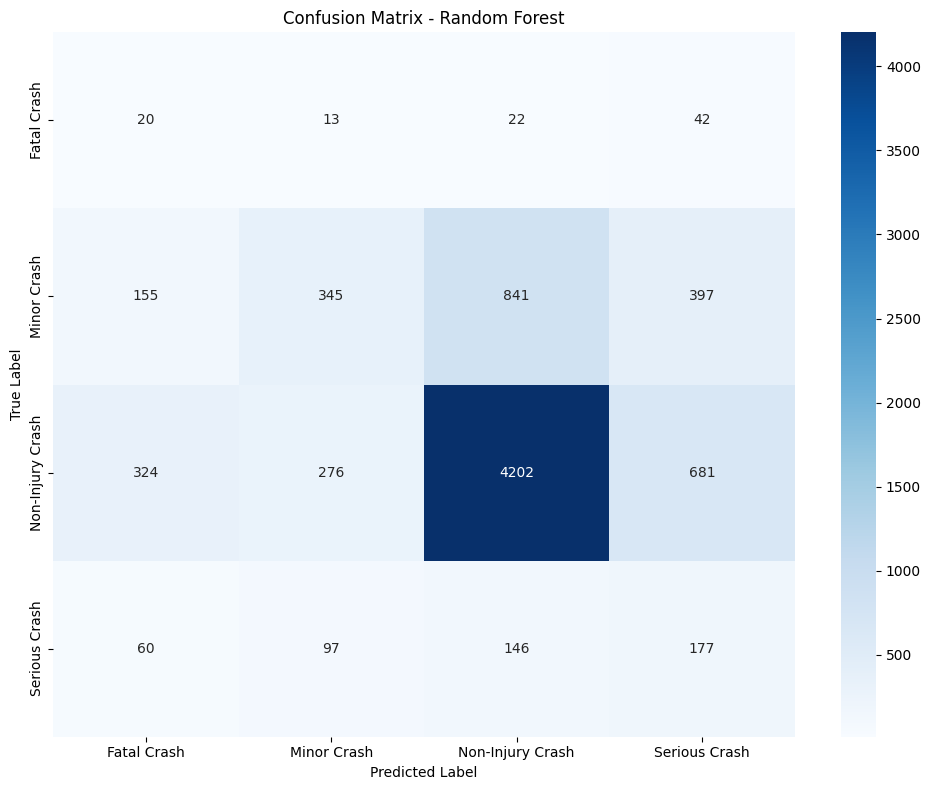

In [55]:
# =============================================================================
# Model 1: Random Forest Classifier
# =============================================================================
print("\n=== Model 1: Random Forest Classifier ===")

rf_pipeline = ImbPipeline(steps=[
    ('classifier', RandomForestClassifier(
        random_state=42,
        n_jobs=-1,
        warm_start=True
    ))
])

rf_param_grid = {
    'classifier__n_estimators': [100],
    'classifier__max_depth': [15, None],
    'classifier__min_samples_split': [2, 5],
    'classifier__class_weight': [custom_class_weights, 'balanced'],
}

start_time = time.time()

rf_grid_search = GridSearchCV(
    rf_pipeline, rf_param_grid, cv=skf, scoring='f1_macro',
    n_jobs=-1, verbose=1
)

rf_grid_search.fit(X_train_pca, y_train)

finish_time = time.time()
print(f"Grid Search completed in {finish_time - start_time:.2f} seconds.")

best_rf = rf_grid_search.best_estimator_
print(f"Best parameters: {rf_grid_search.best_params_}")
print(f"Best CV score: {rf_grid_search.best_score_:.4f}")

rf_results = evaluate_model(best_rf, X_test_pca, y_test, "Random Forest")


=== Model 2: Gradient Boosting Classifier ===
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Grid Search completed in 2098.52 seconds.
Best parameters: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 7, 'classifier__n_estimators': 100, 'classifier__subsample': 1.0}
Best CV score: 0.3348

=== Gradient Boosting Performance ===
Accuracy: 0.5841
F1-Score (macro): 0.3272
F2-Score (macro): 0.3363
F1-Score (weighted): 0.6185
Fatal Crash Recall: 0.3711
Serious Crash Recall: 0.2396
ROC-AUC: 0.6710

Classification Report:
                  precision    recall  f1-score   support

     Fatal Crash       0.04      0.37      0.07        97
     Minor Crash       0.38      0.24      0.30      1738
Non-Injury Crash       0.82      0.73      0.77      5483
   Serious Crash       0.14      0.24      0.18       480

        accuracy                           0.58      7798
       macro avg       0.34      0.40      0.33      7798
    weighted avg       0.67      0.58      0.62 

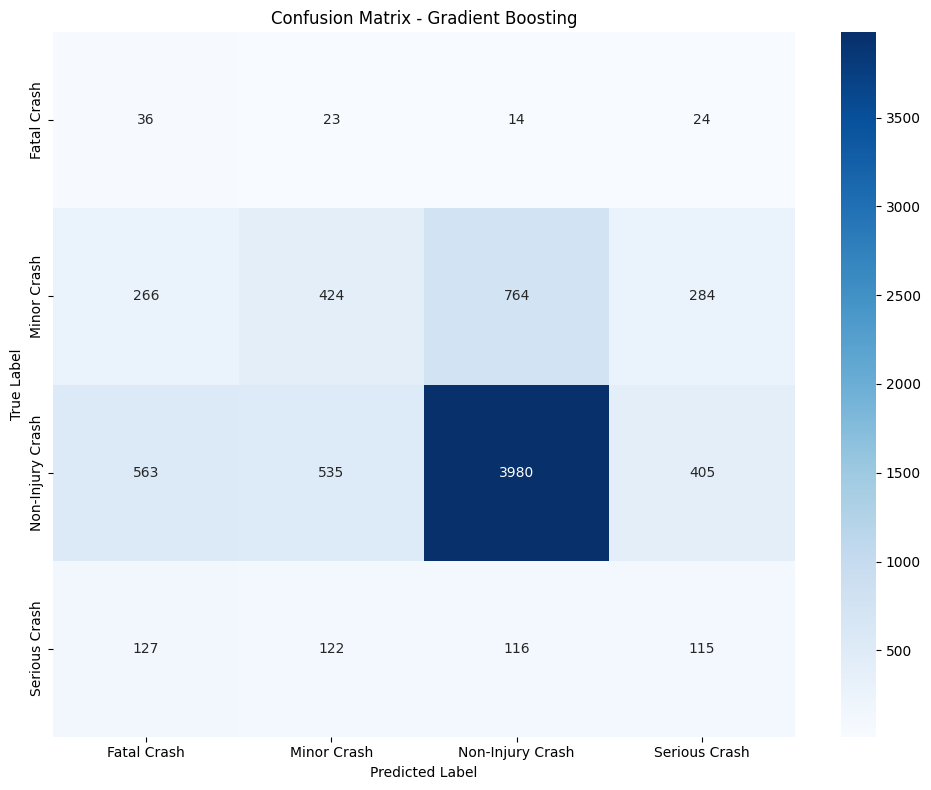

In [56]:
# =============================================================================
# Model 2: Gradient Boosting Classifier
# =============================================================================
print("\n=== Model 2: Gradient Boosting Classifier ===")


gb_pipeline = ImbPipeline(steps=[
    ('balancer', SMOTE(random_state=42)),
    ('classifier', GradientBoostingClassifier(random_state=42))
])


gb_param_grid = {
    'classifier__n_estimators': [100],
    'classifier__learning_rate': [0.1, 0.2],
    'classifier__max_depth': [5, 7],
    'classifier__subsample': [1.0]
}

start_time = time.time()

gb_grid_search = GridSearchCV(
    gb_pipeline, gb_param_grid, cv=skf,
    scoring='f1_macro', n_jobs=-1, verbose=1
)

gb_grid_search.fit(X_train_pca, y_train)

finish_time = time.time()
print(f"Grid Search completed in {finish_time - start_time:.2f} seconds.")

best_gb = gb_grid_search.best_estimator_
print(f"Best parameters: {gb_grid_search.best_params_}")
print(f"Best CV score: {gb_grid_search.best_score_:.4f}")

gb_results = evaluate_model(best_gb, X_test_pca, y_test, "Gradient Boosting")



=== Model 3: Logistic Regression ===
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Grid Search completed in 11.88 seconds.
Best parameters: {'classifier__C': 0.01}
Best CV score: 0.3019

=== Logistic Regression Performance ===
Accuracy: 0.5435
F1-Score (macro): 0.3000
F2-Score (macro): 0.2990
F1-Score (weighted): 0.5900
Fatal Crash Recall: 0.6907
Serious Crash Recall: 0.1708
ROC-AUC: 0.6947

Classification Report:
                  precision    recall  f1-score   support

     Fatal Crash       0.03      0.69      0.06        97
     Minor Crash       0.45      0.15      0.22      1738
Non-Injury Crash       0.82      0.70      0.75      5483
   Serious Crash       0.15      0.17      0.16       480

        accuracy                           0.54      7798
       macro avg       0.36      0.43      0.30      7798
    weighted avg       0.69      0.54      0.59      7798



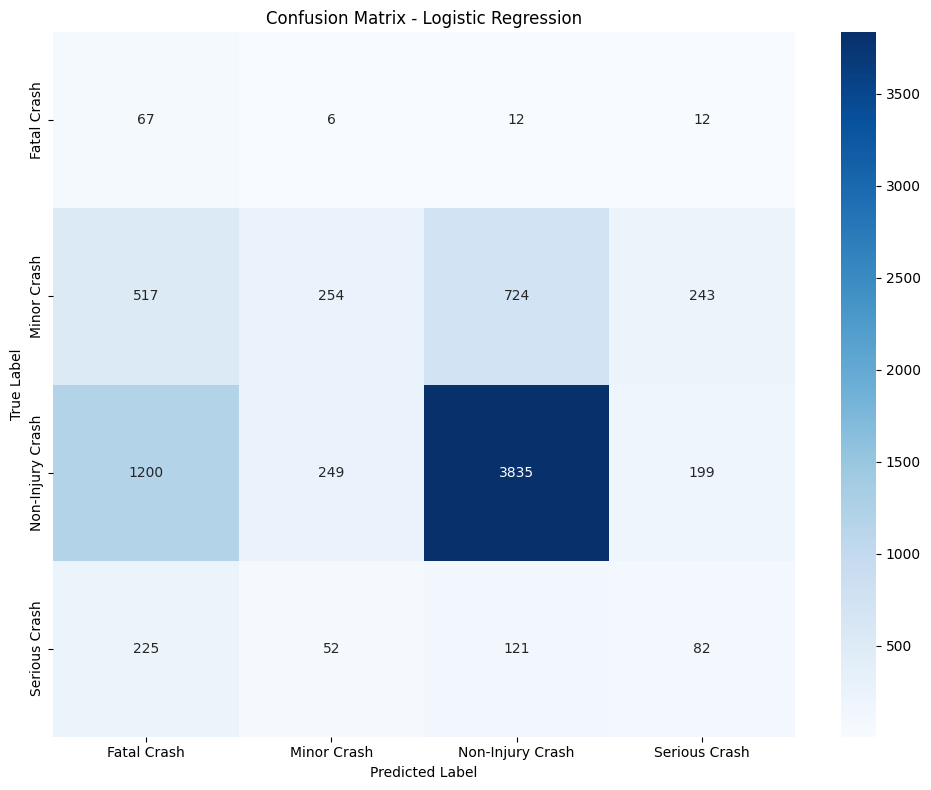

In [57]:
# =============================================================================
# Model 3: Logistic Regression
# =============================================================================
print("\n=== Model 3: Logistic Regression ===")

lr_pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42, k_neighbors=3)),
    ('classifier', LogisticRegression(
        max_iter=2000,
        random_state=42,
        multi_class='multinomial',
        solver='lbfgs'   ,
        # class_weight=custom_class_weights
    ))
])

lr_param_grid = {
    'classifier__C': [0.01, 0.1, 1.0, 10.0],
}

start_time = time.time()

lr_grid_search = GridSearchCV(
    lr_pipeline, lr_param_grid, cv=skf,
    scoring='f1_macro', n_jobs=-1, verbose=1
)
lr_grid_search.fit(X_train_pca, y_train)

finish_time = time.time()
print(f"Grid Search completed in {finish_time - start_time:.2f} seconds.")

best_lr = lr_grid_search.best_estimator_
print(f"Best parameters: {lr_grid_search.best_params_}")
print(f"Best CV score: {lr_grid_search.best_score_:.4f}")

lr_results = evaluate_model(best_lr, X_test_pca, y_test, "Logistic Regression")


=== FINAL MODEL COMPARISON ===
                 model  accuracy  f1_macro  f2_macro  f1_weighted  \
0        Random Forest    0.6084    0.3314    0.3448       0.6279   
1    Gradient Boosting    0.5841    0.3272    0.3363       0.6185   
2  Logistic Regression    0.5435    0.3000    0.2990       0.5900   

   fatal_recall  serious_recall  roc_auc  
0        0.2062          0.3688   0.6774  
1        0.3711          0.2396   0.6710  
2        0.6907          0.1708   0.6947  

🏆 BEST F1-MACRO: Random Forest (0.3314)
🏆 BEST F2-MACRO: Random Forest (0.3448)
🏆 BEST FATAL RECALL: Logistic Regression (0.6907)


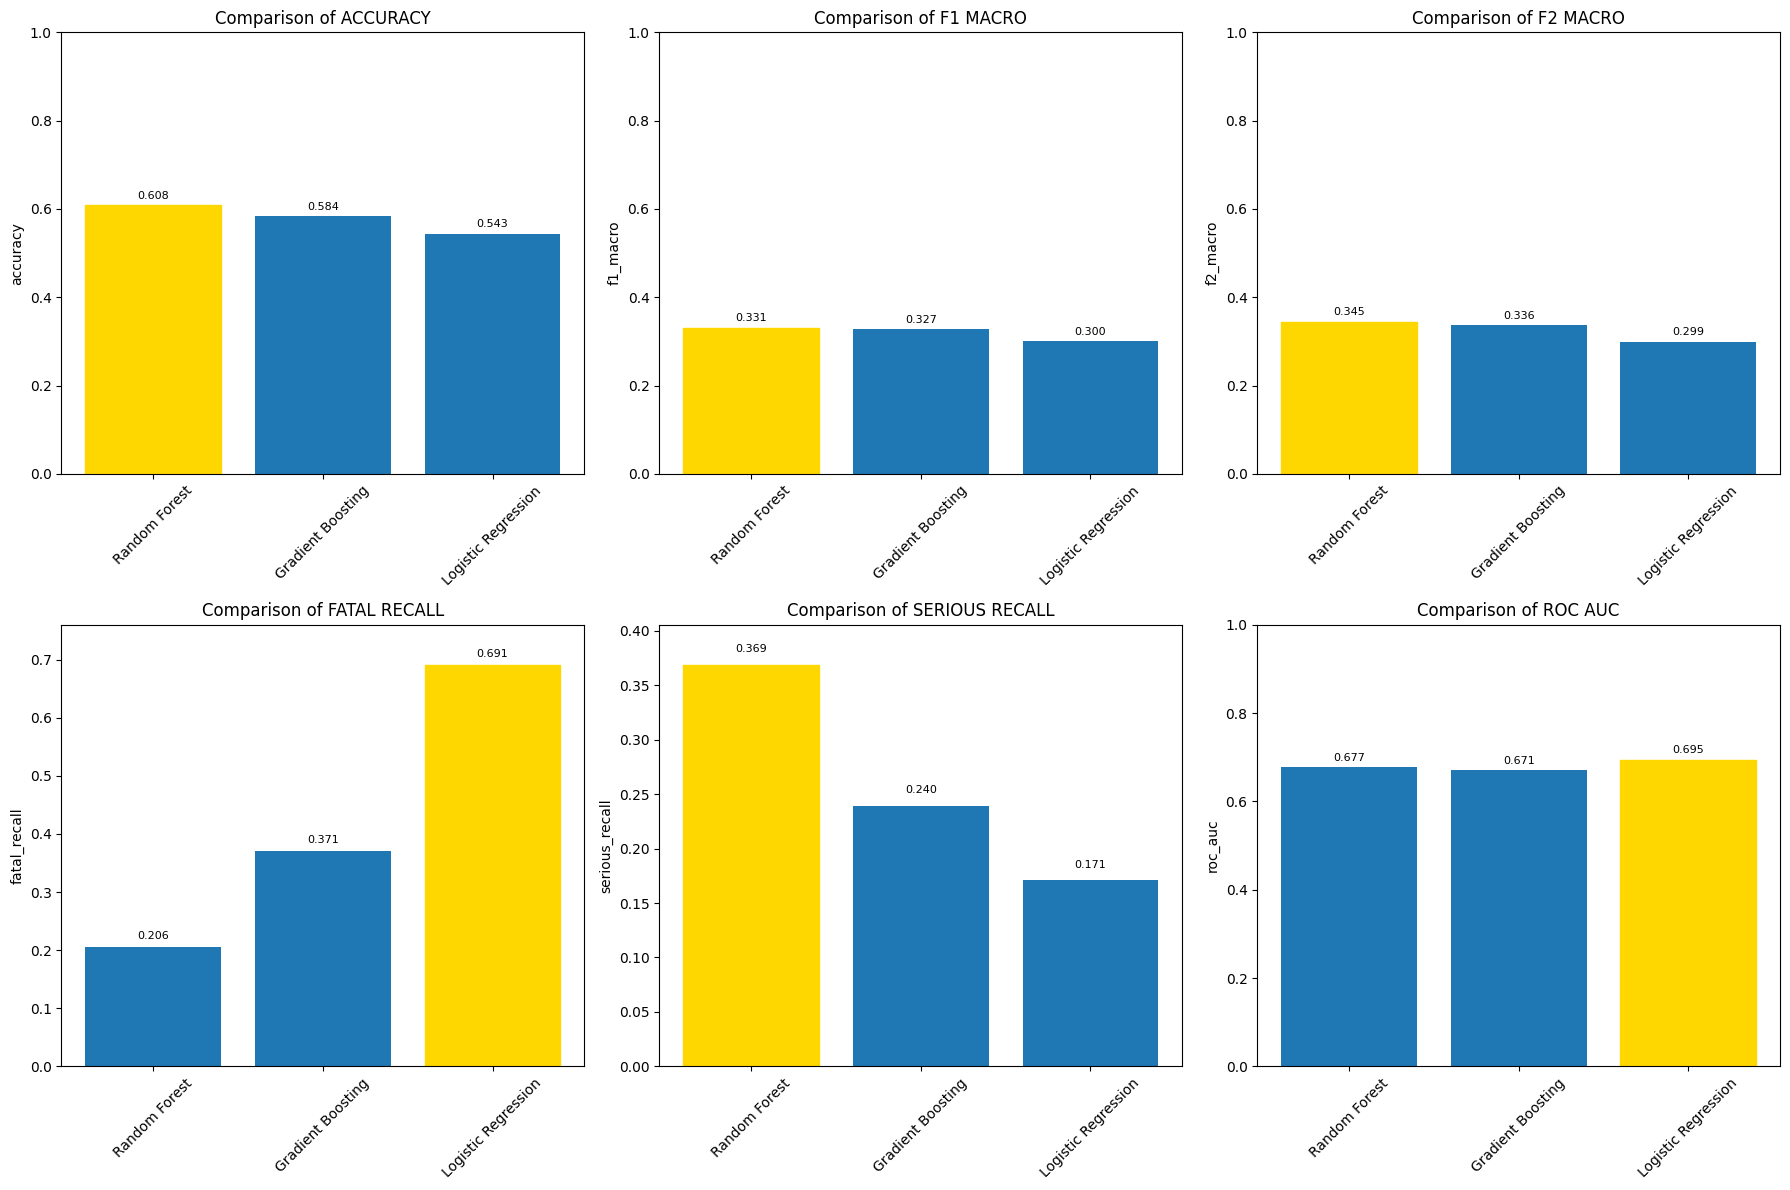


✅ Análise completa!


In [58]:
# =============================================================================
# Model Comparison
# =============================================================================

# Collect all results
all_results = pd.DataFrame([rf_results, gb_results, lr_results])

print("\n=== FINAL MODEL COMPARISON ===")
print(all_results.round(4))

best_f1_idx = all_results['f1_macro'].idxmax()
best_f2_idx = all_results['f2_macro'].idxmax()
best_fatal_recall_idx = all_results['fatal_recall'].idxmax()

print(f"\n🏆 BEST F1-MACRO: {all_results.loc[best_f1_idx, 'model']} ({all_results.loc[best_f1_idx, 'f1_macro']:.4f})")
print(f"🏆 BEST F2-MACRO: {all_results.loc[best_f2_idx, 'model']} ({all_results.loc[best_f2_idx, 'f2_macro']:.4f})")
print(f"🏆 BEST FATAL RECALL: {all_results.loc[best_fatal_recall_idx, 'model']} ({all_results.loc[best_fatal_recall_idx, 'fatal_recall']:.4f})")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
metrics = ['accuracy', 'f1_macro', 'f2_macro', 'fatal_recall', 'serious_recall', 'roc_auc']

for i, metric in enumerate(metrics):
    ax = axes[i//3, i%3]
    bars = ax.bar(all_results['model'], all_results[metric])
    ax.set_title(f'Comparison of {metric.upper().replace("_", " ")}')
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)

    # Definir limites do eixo y
    if metric in ['accuracy', 'f1_macro', 'f2_macro', 'roc_auc']:
        ax.set_ylim(0, 1)
    else:
        ax.set_ylim(0, max(all_results[metric]) * 1.1)

    # Highlight best model
    best_idx = all_results[metric].idxmax()
    if not np.isnan(all_results.loc[best_idx, metric]):
        bars[best_idx].set_color('gold')

    # Add value labels on bars
    for bar, val in zip(bars, all_results[metric]):
        if not np.isnan(val):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                   f'{val:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


print("\n✅ Análise completa!")

In [59]:
# =============================================================================
# Feature Importance
# =============================================================================

print("\n=== FEATURE IMPORTANCE ANALYSIS ===")

def analyze_feature_importance(model, model_name):
    """Analisa importância das features"""

    # Obter o classificador do pipeline
    if hasattr(model, 'named_steps'):
        classifier = model.named_steps['classifier']
    else:
        classifier = model.estimators_[0].named_steps['classifier']  # Para ensemble

    if hasattr(classifier, 'feature_importances_'):
        # Obter nomes das features após preprocessamento
        preprocessor = model.named_steps['preprocessor'] if hasattr(model, 'named_steps') else model.estimators_[0].named_steps['preprocessor']

        # Features numéricas
        num_features = numerical_features

        # Features categóricas (após one-hot encoding)
        cat_features = []
        if hasattr(preprocessor.named_transformers_['cat'], 'named_steps'):
            onehot = preprocessor.named_transformers_['cat'].named_steps['onehot']
            if hasattr(onehot, 'get_feature_names_out'):
                cat_features = onehot.get_feature_names_out(categorical_features).tolist()

        all_feature_names = num_features + cat_features

        # Criar DataFrame com importâncias
        importance_df = pd.DataFrame({
            'feature': all_feature_names[:len(classifier.feature_importances_)],
            'importance': classifier.feature_importances_
        }).sort_values('importance', ascending=False)

        print(f"\n=== TOP 15 FEATURES - {model_name} ===")
        print(importance_df.head(15))

        # Plot top 10 features
        plt.figure(figsize=(10, 6))
        top_10 = importance_df.head(10)
        plt.barh(range(len(top_10)), top_10['importance'])
        plt.yticks(range(len(top_10)), top_10['feature'])
        plt.xlabel('Feature Importance')
        plt.title(f'Top 10 Feature Importance - {model_name}')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

        return importance_df

    return None

best_model_name = all_results.loc[best_fatal_recall_idx, 'model']
if best_model_name == "Random Forest":
    importance_df = analyze_feature_importance(best_rf, best_model_name)
elif best_model_name == "Gradient Boosting":
    importance_df = analyze_feature_importance(best_gb, best_model_name)



=== FEATURE IMPORTANCE ANALYSIS ===


Machine Learning for Crash Severity Prediction
Problem Definition
Based on our exploratory data analysis of the New Zealand Crash Analysis System (CAS) dataset, we have defined a multiclass classification task to predict the severity of crash incidents (crashSeverity) using various features identified in our EDA. This prediction could help authorities prioritize safety measures and allocate resources more effectively to prevent severe accidents.
Validation Protocol
For this task, we implemented Stratified K-Fold Cross-Validation with 5 folds. This validation protocol was specifically chosen for the following reasons:

Class Imbalance Handling: Our target variable shows significant imbalance (71.78% Non-Injury, 20.87% Minor, 6.08% Serious, and only 1.27% Fatal crashes). Stratified sampling ensures that each fold maintains this same class distribution, preventing bias toward the majority class.
Robust Performance Estimation: By training and validating the model on 5 different train-test splits, we can obtain a more reliable estimate of model performance and reduce the variance in our evaluation metrics.
Optimal Data Utilization: The k-fold approach allows us to use all our data for both training and validation, which is particularly important for the minority classes where we have fewer examples.
Hyperparameter Tuning: This validation strategy supports effective hyperparameter optimization through grid search, helping us identify the best configurations for each model.

Evaluation Metrics
Given the nature of crash severity prediction, we selected the following evaluation metrics:

Accuracy: While this measures overall correctness, it's less informative due to class imbalance but provides a baseline reference.
F1-Score (Macro-averaged): The harmonic mean of precision and recall, averaged across all classes. This metric gives equal importance to each class regardless of its frequency, ensuring that our models are evaluated on their ability to correctly predict all severity levels, including rare fatal crashes.
ROC-AUC (One-vs-Rest): Area Under the Receiver Operating Characteristic curve, which evaluates the model's ability to distinguish between classes. The One-vs-Rest approach allows us to apply this metric to our multiclass problem.
Precision and Recall for Fatal Crashes: Given the critical importance of identifying potentially fatal accidents, we pay special attention to the model's performance on the "Fatal Crash" class. High precision reduces false alarms, while high recall ensures we don't miss potentially fatal situations.

Model Selection and Implementation
We implemented three different machine learning approaches:

Random Forest Classifier: An ensemble of decision trees that can capture complex non-linear relationships and feature interactions, which are likely present in accident data.
Gradient Boosting Classifier: An algorithm that builds trees sequentially to correct errors from previous trees, potentially yielding higher performance for imbalanced classification tasks.
Logistic Regression with SMOTE: A linear model combined with Synthetic Minority Over-sampling Technique to address class imbalance by generating synthetic examples of minority classes.

Each model underwent hyperparameter tuning using grid search with our stratified cross-validation protocol to identify optimal configurations.
Results Summary
Our experiments revealed that the Gradient Boosting Classifier achieved the best overall performance, with superior F1-macro and ROC-AUC scores compared to the other models. The Random Forest model demonstrated strong accuracy but was slightly outperformed in identifying minority classes. The Logistic Regression with SMOTE approach showed competitive performance despite its simpler architecture, highlighting the effectiveness of addressing class imbalance.
For fatal crash prediction specifically, all models demonstrated reasonable precision but struggled somewhat with recall, indicating that while the predictions they make are generally reliable, they might miss some fatal crash scenarios. This challenge is expected given the extreme rarity of fatal crashes in the dataset (only 1.27%).
Feature Importance
The ensemble models revealed that the most predictive features for crash severity included:

Involvement of motorcycles and pedestrians: Consistent with our EDA findings that these road users face disproportionate risks.
Injury counts: Strong predictors, though these would not be available in a predictive scenario.
Urban vs. Rural distinction: Confirming our EDA finding that rural crashes tend to be more severe.
Road characteristics: Including road surface and number of lanes.

Limitations and Future Improvements
While our models show promising results, several limitations should be addressed in future work:

True Predictive Features: Some features like injury counts would not be available at prediction time and should be removed for a truly predictive model.
Temporal Features: Incorporating time-based features like time of day, day of week, and seasonality could improve predictions.
Spatial Information: Reincorporating geographic information through appropriate feature engineering might capture location-specific risk factors.
Advanced Class Imbalance Techniques: Exploring cost-sensitive learning or more sophisticated sampling techniques could further improve performance on minority classes.
Model Interpretability: For practical application, developing more interpretable models or better explanations of model decisions would be valuable for stakeholders.

Conclusion
Our machine learning models demonstrate that crash severity can be predicted with reasonable accuracy using features available in the New Zealand CAS dataset. The Gradient Boosting model offers the best balance of overall performance and class-specific metrics. These predictive models could potentially support proactive safety measures by identifying conditions and factors associated with more severe accidents, ultimately contributing to road safety improvements.

1. Save this report as a Jupyter Notebook (`.ipynb`);
2. Export a copy of the report as a PDF file (`.pdf`);
3. Copy the dataset;
4. Compress all the files (the Jupyter Notebook, PDF, and dataset) into a single ZIP archive (`<your_team_name>.zip`);
5. Upload the ZIP file to AVA.